## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

# Doğrusal Regresyon (Linear Regression)

🎯 Bu egzersizde, bir NBA oyuncusunun win rating (`win_rating`) performansını, oynadığı dakika (`mp`) gibi maç istatistiklerine göre modelleyeceksiniz.


👉 [NBA.csv](https://d32aokrjazspmn.cloudfront.net/materials/NBA.csv) dataset’ini bu notebook’a bir pandas dataframe olarak yükleyin ve ilk 5 satırını görüntüleyin.

In [3]:
df = pd.read_csv("NBA.csv")
df.head(5)

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


ℹ️ Dataset’in detaylı açıklamasını challenge README dosyasında bulabilirsiniz. Challenge boyunca buna mutlaka referans verin.


## 1. Özellik Setini ve Hedefi Tanımlayın (Define Feature Set and Target)

🎯 İlk hedef, oyuncuların akranlarına kıyasla genel performans puanı olan *Wins Above Replacement* (`win_rating`) değerini, oynadıkları dakika sayısına (`mp`) göre modellemektir.

👉 Bu iki değişkeni `X` ve `y` olarak atayın. `X`’in feature(lar), `y`’nin ise target olduğunu unutmayın.

In [4]:
X = df[["mp"]]
y = df["win_rating"]

👉 Bir [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) kullanarak rating ile oynanan dakika sayısı arasındaki ilişkiyi görselleştirin.

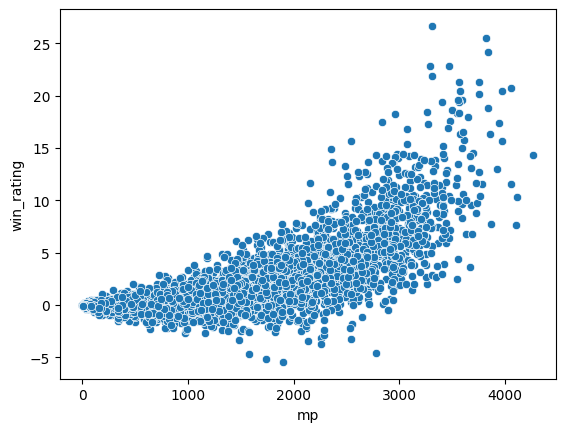

In [8]:
sns.scatterplot(x="mp", y="win_rating", data=df)

plt.xlabel("mp")
plt.ylabel("win_rating")
plt.show()


ℹ️ Scatter plot, aralarında bir ilişki olduğunu düşündürmeli. Ancak bu ilişki tamamen doğrusal mı? 🤔 Göreceğiz!

## 2. Çapraz Doğrulama (Cross-Validation)

👉 Sklearn’in [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) fonksiyonunu kullanarak, oyuncu performans rating’ini oynanan dakika sayısına göre tahmin eden bir [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) modeli üzerinde 5-fold cross-validation çalıştırın. Cross-validation’ın ham çıktısını `cv_results` adlı yeni bir değişkende saklayın.

In [10]:
lin_reg_model = LinearRegression()

cv_results = cross_validate(
    lin_reg_model,
    X,
    y,
    cv=5,
    scoring="r2",        # regresyon için standart metrik
    return_train_score=True
)

print(cv_results)

{'fit_time': array([0.00979757, 0.00591159, 0.00711799, 0.00773787, 0.00495648]), 'score_time': array([0.00648522, 0.00647736, 0.00444365, 0.00362086, 0.0052104 ]), 'test_score': array([0.5555057 , 0.53447908, 0.53790391, 0.57658459, 0.57917762]), 'train_score': array([0.56003925, 0.56367302, 0.5653569 , 0.55561258, 0.55502215])}


❓ Cross-validation sonuçları içindeki en düşük skor nedir?  
Cevabınızı hesaplayın ve değeri `min_score` adlı yeni bir değişkende saklayın.

In [13]:
min_score = cv_results["test_score"].min()
min_score

np.float64(0.5344790822272503)

❓ Cross-validation sonuçları içindeki en yüksek skor nedir?  
Cevabınızı hesaplayın ve değeri `max_score` adlı yeni bir değişkende saklayın.

In [14]:
max_score = cv_results["test_score"].max()
max_score

np.float64(0.5791776193355004)

❓ Cross-validation sonuçlarının ortalama skoru nedir?  
Cevabınızı hesaplayın ve değeri `mean_score` adlı yeni bir değişkende saklayın.

In [15]:
mean_score = cv_results["test_score"].mean()
mean_score

np.float64(0.556730180006891)

ℹ️ Cross-validation çalıştırırken, model performansının en sağlam ve en temsil edici değerlendirmesi olarak her zaman ortalama skora bakarız.

### ☑️ Kodunu Test Et

In [16]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'cv_results',
    cv_result = cv_results,
    mean_score = mean_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/wit/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/wit/code/S16D1-S-data-linear-regression/tests
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 2 items

test_cv_results.py::TestCvResults::test_cv_mean PASSED                   [ 50%]
test_cv_results.py::TestCvResults::test_cv_results PASSED                [100%]

============================== 2 passed in 0.33s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master



🤔 **Şimdi K-fold sayısının `K` (yani `cross_validate()` içindeki `cv` parametresi) etkisini inceleyelim**

👉 `K` değeri 2’den 20’ye çıkarken **<u>toplam</u> hesaplama süresinin (fit + score)** ve **<u>ortalama</u> skorun** nasıl değiştiğini plot edin.

<details>
  <summary markdown='span'><strong>İpucu</strong></summary>

  1. `K` değerlerini, hesaplama sürelerini ve cv ortalama skorlarını saklamak için 3 liste oluşturun.
  1. 2’den 20’ye kadar `K` değerleri üzerinde döngü kurun ve her seferinde:
     1. Cross-validation çalıştırın.
     1. `fit_time` ve `score_time` toplamını, toplam süreler listenize ekleyin.
     1. Ortalama `test_score` değerini, cv ortalama skorları listenize ekleyin.
  1. İki adet plot oluşturun:
     1. `K`’ye karşı toplam süre.
     1. `K`’ye karşı ortalama skor.
</details>


In [18]:
k_values = list(range(2, 21))
total_times = []
mean_scores = []

model = LinearRegression()

for k in k_values:
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=k,
        scoring="r2",          # veya accuracy / neg_mean_squared_error
        return_train_score=False
    )

    # fit + score sürelerinin toplamı
    total_time = cv_results["fit_time"].sum() + cv_results["score_time"].sum()
    total_times.append(total_time)

    # test skorlarının ortalaması
    mean_score = cv_results["test_score"].mean()
    mean_scores.append(mean_score)


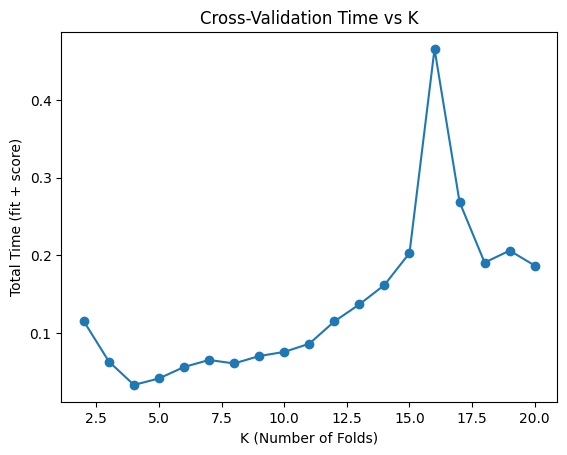

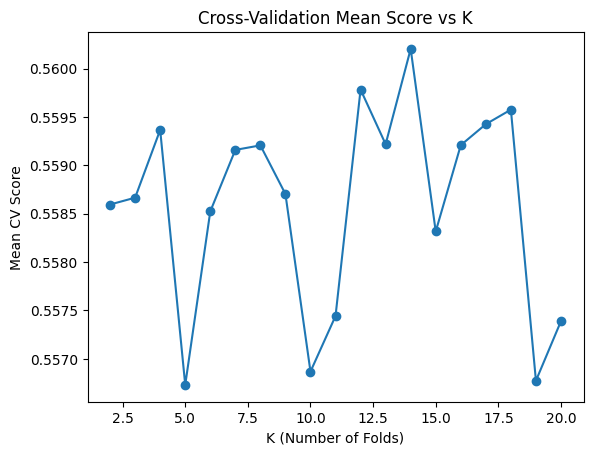

In [19]:
plt.figure()
plt.plot(k_values, total_times, marker="o")
plt.xlabel("K (Number of Folds)")
plt.ylabel("Total Time (fit + score)")
plt.title("Cross-Validation Time vs K")
plt.show()


plt.figure()
plt.plot(k_values, mean_scores, marker="o")
plt.xlabel("K (Number of Folds)")
plt.ylabel("Mean CV Score")
plt.title("Cross-Validation Mean Score vs K")
plt.show()


ℹ️ $R^2$ skorunun sabit kaldığını görmelisiniz; bu, modelin hem daha küçük hem de daha büyük test setlerinde benzer performans gösterdiğinin iyi bir işaretidir. Buna karşılık, hesaplama süresi artmaya devam eder. Bu nedenle, pratik bir kural olarak genellikle K = 10’un üzerine çıkmayız.

## 3. Modeli eğit (Train the Model)

Cross-validation, veri seti üzerinde varsayımsal bir modeli değerlendirmek için kullanılır. Seçtiğiniz fold sayısı kadar modeli birden fazla kez eğitir; her seferinde verinin farklı bir alt kümesi üzerinde eğitilir ve kalan veriyle skor hesaplanır. Bu süreç bize, modelin ne kadar iyi performans gösterebileceğini gösteren cross-validated bir skor verir.

Ancak modeli gerçek anlamda tahmin yapmak için kullanmak istediğinizde, mümkün olduğunca fazla veriyle eğitmeyi tercih edersiniz. Yani verinin bir kısmını ayırmadan.

👉 Modeli, tam `X` ve `y` üzerinde eğitin (model skorunu zaten doğruladık, şimdi tahmin için kullanacağız). Eğitilmiş modeli `model` adlı değişkende saklayın.

In [20]:
model.fit(X, y)

LinearRegression()

❓ Eğitilmiş modelinizin eğimi (slope) ya da katsayısı (coefficient) nedir?  
Bu değere modelin attribute’ları üzerinden erişebilirsiniz. Eğimi `slope` adlı bir değişkende saklayın.

In [27]:
print(model.intercept_)
print(model.coef_)
slope = model.coef_[0]

-1.5463749371639444
[0.00260258]


❓ Eğitilmiş modelinizin intercept (sabit terim) değeri nedir?  
Bu değere modelin attribute’ları üzerinden erişebilirsiniz. Intercept değerini `intercept` adlı bir değişkende saklayın.

In [28]:
intercept = model.intercept_

🤔 Devam etmeden önce bu katsayıları nasıl yorumlayacağınızı anladığınızdan emin olun.

### ☑️ Kodunu Test Et

In [29]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'trained_model',
    slope = slope,
    intercept = intercept
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/wit/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/wit/code/S16D1-S-data-linear-regression/tests
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 2 items

test_trained_model.py::TestTrainedModel::test_intercept PASSED           [ 50%]
test_trained_model.py::TestTrainedModel::test_slope PASSED               [100%]

============================== 2 passed in 0.66s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master



## 4. Tahmin (Predict)

👉 Eğitilmiş modelinizi kullanarak toplamda 1000 dakika oynamış bir oyuncunun performans rating’ini tahmin edin.  
Tahmin edilen değeri `prediction` adlı bir değişkende saklayın.

In [34]:
new_datapoint = pd.DataFrame.from_dict(
    {"mp": [1000]}
)

# Model ile tahmin yapın
prediction = model.predict(new_datapoint)[0]
prediction

np.float64(1.0562050014762487)

### ☑️ Kodunu Test Et

In [35]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'prediction',
    prediction = prediction
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/wit/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/wit/code/S16D1-S-data-linear-regression/tests
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction PASSED               [100%]

============================== 1 passed in 0.24s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master



## 5.  Daha Fazla Özellik ile Modeli İyileştirme (Improving the Model with More Features)

NBA fantasy league’i seven bir arkadaşınız size bazı içgörülerle geliyor 🏀

Bir oyuncunun *Wins Above Replacement* rating’ini değerlendirirken, genellikle topa sahip olma sayısına (`poss`), savunma/hücum oranına (`do_ratio`) ve `pacing` değerine de baktıklarını söylüyor.

❓ Aşağıdaki hücreyi çalıştırarak bu yeni feature’lar ile `win_rating` arasındaki korelasyonu görselleştirin.  
Yukarıdaki feature’lardan **hangisini** modelinize eklemeyi düşünürdünüz?

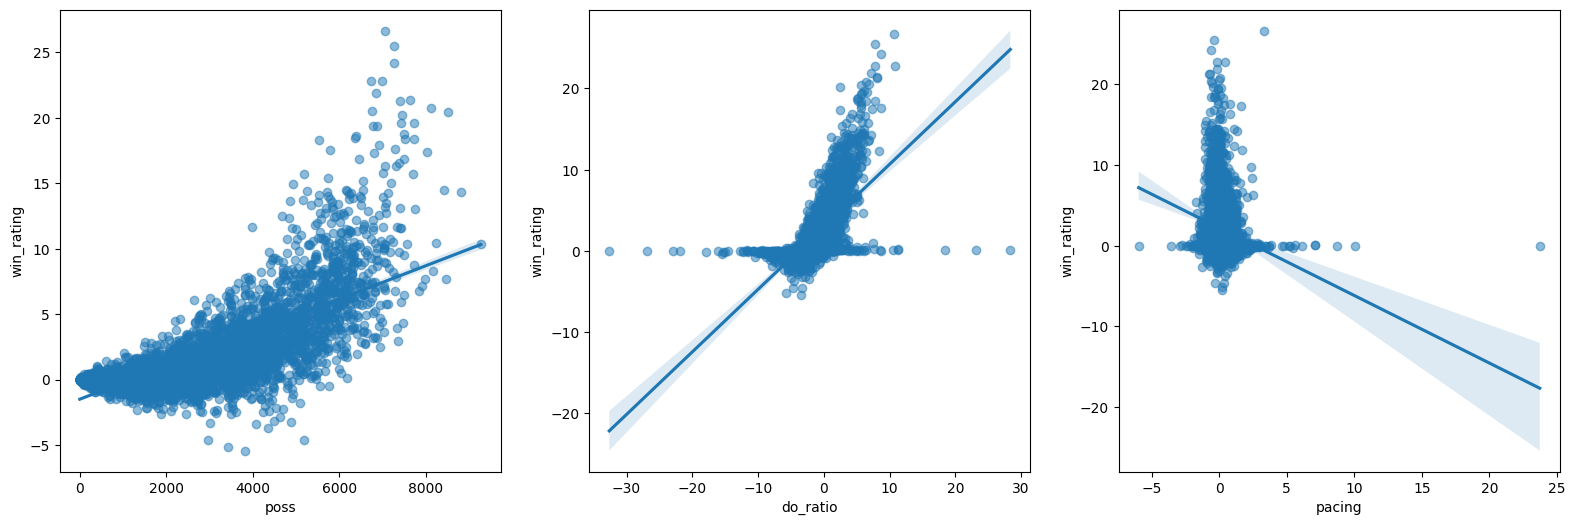

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))

plt.subplots_adjust(left=0.5, right=2)

sns.regplot(data=df, y='win_rating', x='poss', ax=axes[0], scatter_kws={'alpha':0.5})
sns.regplot(data=df, y='win_rating', x='do_ratio', ax=axes[1], scatter_kws={'alpha':0.5})
sns.regplot(data=df, y='win_rating', x='pacing', ax=axes[2], scatter_kws={'alpha':0.5})

plt.show()

<details>
  <summary markdown='span'><strong>Cevap</strong></summary>

  Feature’ları manuel olarak seçecek olsaydınız, hedef değişken olan `win_rating` ile en yüksek korelasyona sahip olanlarla başlardınız.

  Regresyon plot’larına baktığımızda, geriye `poss` ve `do_ratio` kalıyor. Sayısal değerleri görmek isterseniz `df.corr()[['win_rating']]` çıktısına bakabilirsiniz.

  Peki neden `poss` değil? Sonuçta `win_rating` ile olan korelasyonu `do_ratio`’dan daha yüksek.

  Bir de şuna bakın: `sns.scatterplot(data=df, x='mp', y='poss');`. Nedenini görebiliyor musunuz?

  <details>
  <summary><strong>Cevap</strong></summary>

  Görünen o ki, ilk feature’ımız olan `mp` ile `poss` neredeyse mükemmele yakın şekilde korelasyonlu. Bu yüzden `poss`, modele çok az ek değer katacaktır.

  </details>

</details>

,win_rating
season,-0.042861
poss,0.742017
mp,0.748268
do_ratio,0.666120
pacing,-0.202611
win_rating,1.000000


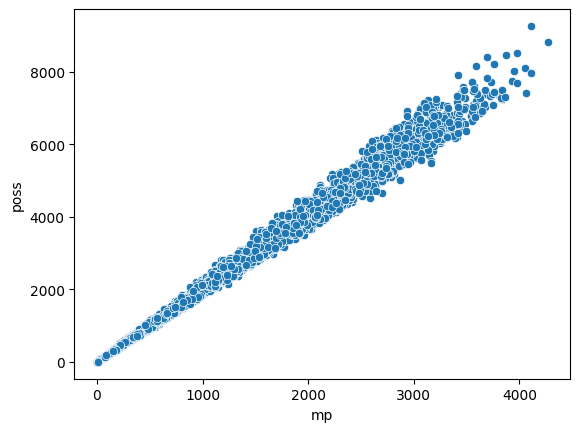

In [43]:
sns.scatterplot(data=df, x='mp', y='poss')
df.corr()[['win_rating']]

Şimdi, iki feature kullanan modelin (seçtiğiniz yeni feature ve `mp`) bir oyuncunun rating’ini tahmin etmede ilk modelimizden daha iyi olup olmadığına bakalım.

👉 İki sütunlu bir DataFrame olacak şekilde yeni bir feature set’i oluşturun.

In [39]:
X = df[["mp", "do_ratio"]]
y = df["win_rating"]

👉 Şimdi yeni bir linear regression modeli için cross-validation çalıştırın ve **ortalama** skoru `mean_2_feat_score` değişkenine kaydedin.

> Not: Eğer sadece cross-validation skoruyla ilgileniyorsanız (hesaplama süreleriyle değil), sklearn’in [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) fonksiyonunu kullanabilirsiniz.

In [41]:
cv_scores = cross_val_score(
    model,
    X,
    y,
    cv=5,          # genelde 5-fold
    scoring="r2"   # regression için varsayılan
)

mean_2_feat_score = cv_scores.mean()
mean_2_feat_score

np.float64(0.6317728310765246)

### ☑️ Kodunu Test Et

In [42]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'improved_score',
    improved_score = mean_2_feat_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/wit/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/wit/code/S16D1-S-data-linear-regression/tests
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 1 item

test_improved_score.py::TestImprovedScore::test_improved_score PASSED    [100%]

============================== 1 passed in 0.32s ===============================


💯 You can commit your code:

git add tests/improved_score.pickle

git commit -m 'Completed improved_score step'

git push origin master



$R^2$ değerinizde **yaklaşık %8’lik bir artış** görmelisiniz 👏

Tebrikler, ilk manuel *feature selection* işleminizi gerçekleştirdiniz — bu hafta bunun daha birçok yolunu göreceğiz!

🤔 Peki Linear Regression ile yapabileceğimiz en iyi şey bu mu? Bir sonraki challenge’da bunu daha derinlemesine keşfedelim!

# 🏁